<a href="https://colab.research.google.com/github/Fennecnightingale/Workbooks/blob/master/Neural_Network_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nnfs 
import numpy as np
import nnfs
import matplotlib.pyplot as plt
import math

In [ ]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

In [ ]:
#from scratch
layer_outputs = [] #output (current layer)
for neuron_weights, neuron_bias in zip(weights,biases):
  neuron_output = 0 #output (given neuron)
  for n_input, weight in zip(inputs, neuron_weights):
    neuron_output += n_input*weight
  neuron_output += neuron_bias
  layer_outputs.append(neuron_output)
print(layer_outputs)
#a tensor is an object that can be represented as an array
# and the dot product  is the result of element wise @ the same index multiplication for each value in your array

In [ ]:
#using numpy
output = np.dot(weights, inputs) + biases
print(output)
# think of it like a line on a graph 
# y=m*x+b == output=weight*input+bias

In [ ]:
# transposing so our dimensions line up
inputs = [[1, 2, 3, 2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5, 2.7, 3.3, -0.8]]
output = np.dot(inputs,np.array(weights).T) + biases
print(output)

In [ ]:
# adding another layer
weights2 = [[0.1,-0.14,0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

In [ ]:
layer1_output = np.dot(inputs,np.array(weights).T) + biases
layer2_output = np.dot(layer1_output,np.array(weights2).T) + biases2

In [ ]:
# turning this into an object
np.random.seed(0)
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]
# not transposing weights because in initializing we can control the shape we don't want to be doing that operation every time
class layer_dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases
print(0.10*np.random.randn(4, 3))

In [ ]:
# the inputs is the number(features per sample)

layer1 = layer_dense(4,5)
layer2 = layer_dense(5,2)

layer1.forward(X)
layer2.forward(layer1.output)
print(layer2.output)

In [ ]:
# the value of the dot product  is fed into the activation 
# function which then outputs the values being fed into
# the next layer(the network)
# the activation function that we are going to use is a linear rectified activation function
# next we're going to do an example(this)

In [ ]:
# this activation function makes every number under 0==0
example_input= [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []
for i in example_input:
  if i>0:
    output.append(i)
  elif i<=0:
    output.append(0)
print(output)

In [ ]:
# trying this in raw python
output = []
for i in example_input:
  output.append(max(0, i))
print(output)

In [ ]:
# crafting a rectified linear unit object using nnnfs package
class activation_relu:
  def forward(self, inputs):
    self.output = np.maximum(0,inputs)

In [ ]:
nnfs.init()
# will be using this package to generator data before moving on to a real dataset

def create_data(points, classes):
  X = np.zeros((points*classes, 2))
  y = np.zeros(points*classes, dtype='uint8')
  for class_number in range(classes):
    ix =range(points*class_number, points*(class_number+1))
    r = np.linspace(0.0, 1,points)
    t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
    X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
    y[ix] = class_number
    return X, y
 
print("here")

In [ ]:
# creating the data and plotting it
X, y = create_data(100, 3)
plt.scatter(X[:, 0], X[:, 1] )
plt.show()

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")
plt.show()

In [ ]:
from nnfs.datasets import spiral_data
X, y = spiral_data(100, 3)

layer1 = layer_dense(2,5)
layer1.forward(X)

In [ ]:
# printing so that we can see what happens without the activation func
print(layer1.output)

In [ ]:
# Print the output of the activation function to show it work
activation1 = activation_relu()
activation1.forward(layer1.output)
print(activation1.output)

In [ ]:
# if network starts showing all 0 that is referred to as the network is dying
# the rectified linear function is not complex enough for what  we are hoping to achieve
# because it does not look at the neurons from a relative standpoint but on a neuron by neuron basis
# we cannot simply do nothing, and using squares or absolute values looses too much of the information needed for back propagation
# eulers number (e≈2.718281828459045) and the exponentiation function y=e^x will allow us to keep the information about our negative numbers without them substantially negitivley impacting our model
# raw python exponentation function

E = math.e
exp_values=[]
for output in layer_outputs:
    exp_values.append(E**output)
print(exp_values)

In [ ]:
# 'it's going to be
# a single output neuron's value divided
# by the sum of all of the other
# output neurons in that output layer and
# this gives us the probability distribution
# that we that we want
# but we still want to exponentiate before
# this point because again we need to get
# rid of
# all of these negative values but we do
# not want to lose the meaning
# of the negative value so we're
# exponentiating to
# convert negatives to positives without
# actually losing the meaning of a
# negative value'

norm_base = sum(exp_values)
norm_values = []
for value in exp_values:
  norm_values.append(value / norm_base)
print(sum(norm_values))
print(norm_values)

In [ ]:
# convert this to numpy
exp_values = np.exp(layer_outputs)
norm_values = exp_values/np.sum(exp_values)
print(sum(norm_values))
print(norm_values)
# input-exponentiate-normalize-output  == softmax

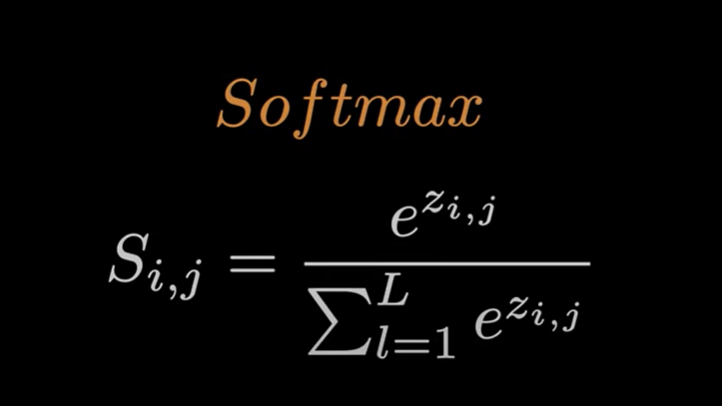

In [ ]:
# implement this into our neural net 
# first convert to work in batch

In [ ]:
# exponentiation can cause numbers to get really big really fast 
# so we are going to write an overflow function to put our numbers back on the zero to one scale 
# this will work by subtracting the largest number from all of the other numbers and because they will all be below zero
# our activeation function will normalize theem
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]
exp_values = np.exp(layer_outputs)
norm_value = exp_values / np.sum(exp_values, axis=1,keepdims=True)
print(norm_values)

In [ ]:
class activation_softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

In [ ]:
X, y = spiral_data(samples=100, classes=3)

dense1 = layer_dense(2,3)
activation1 = activation_relu()

dense2 = layer_dense(3, 3)
activation2 = activation_softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

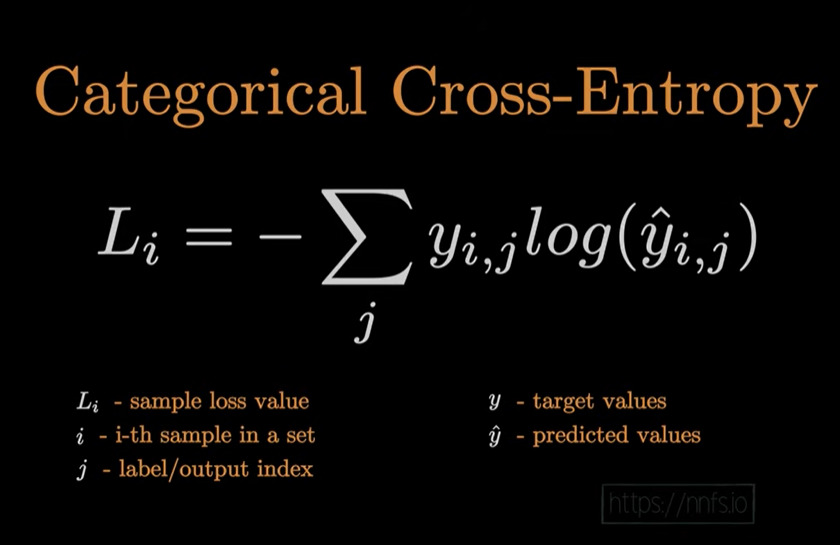

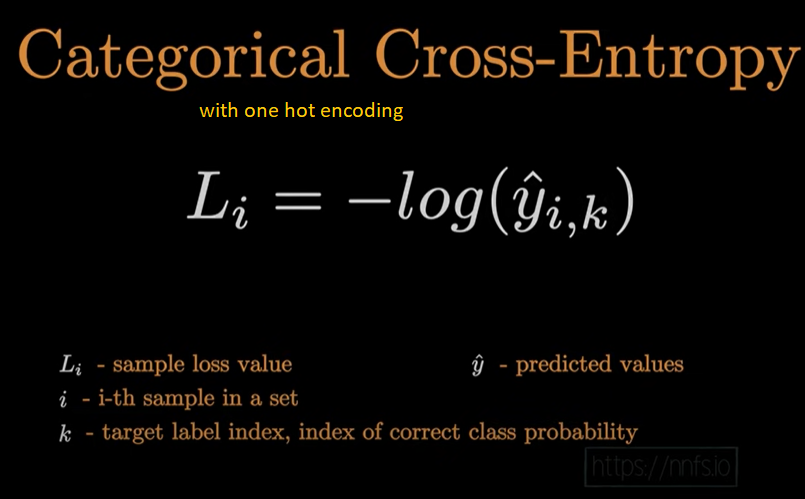

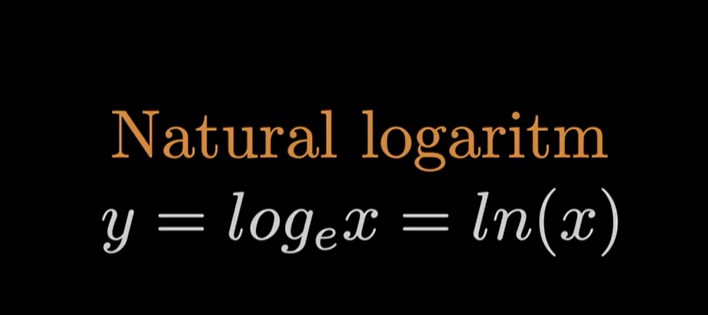

In [ ]:
# natural log uses eulers number (e) not base 10, standard assumption in machine learining is natural log
# log is solving  for x 
# e ** x = b
b = 5.2
print(np.log(b))

In [ ]:
# checking this
print(math.e ** 1.6486586255873816)

In [ ]:
# coding catagorical cross entropy solution example
softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]
loss = -(math.log(softmax_output[0]) * target_output[0] +
         math.log(softmax_output[1]) * target_output[1] +
         math.log(softmax_output[2]) * target_output[2])
print(loss)

In [ ]:
# this is equal to:
loss = -math.log(softmax_output[0])
print(loss)
# or this:
print(-math.log(0.7))

In [ ]:
# if your confidence in your prediction is lower your loss is higher, which you can see when we change our target class value
print(-math.log(0.5))

In [ ]:
# using numpy we can easily grab our predicted vrlues from our output arrays
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]
print(softmax_outputs[[0, 1, 2], class_targets])

In [ ]:
# and to get our losses
neg_log = -np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
])


print(neg_log)

In [ ]:
# we can calculate our average loss using  numpy.mean
average_loss = np.mean(neg_log)
print(average_loss)

In [ ]:
# we can't use just this because the negative log of zero is infinite
# and a mean including infinity is always equal to infinity
# so we clip and cut our numbers off 
class loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

class loss_categorical_cross_entropy(loss):
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
    negative_log_likelihood = -np.log(correct_confidences)
    return negative_log_likelihood

if

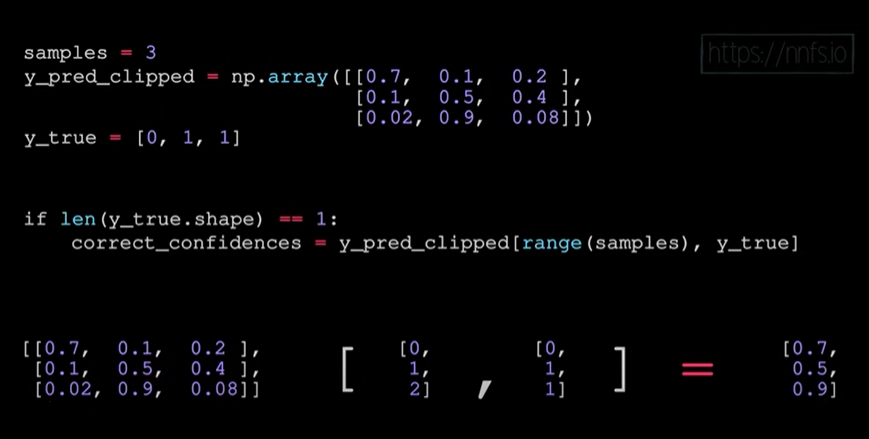

elif

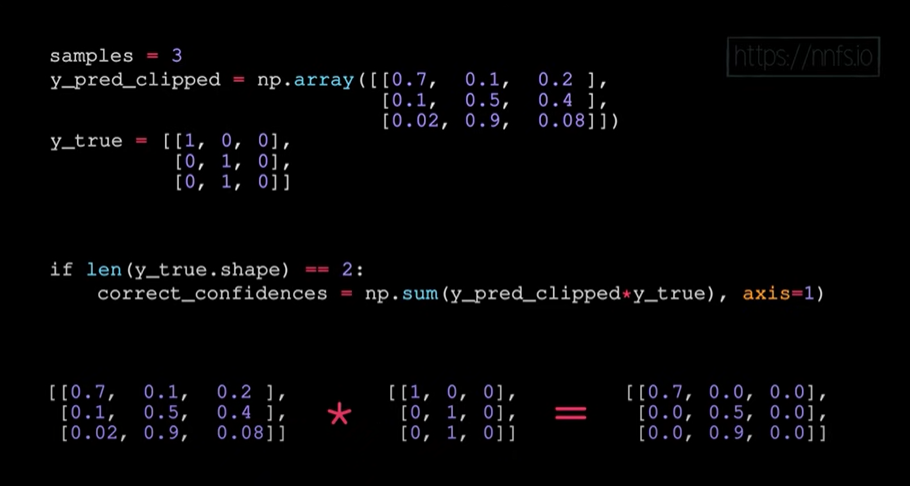

In [ ]:
loss_function = loss_categorical_cross_entropy()
loss = loss_function.calculate(activation2.output, y)
print("loss:", loss)

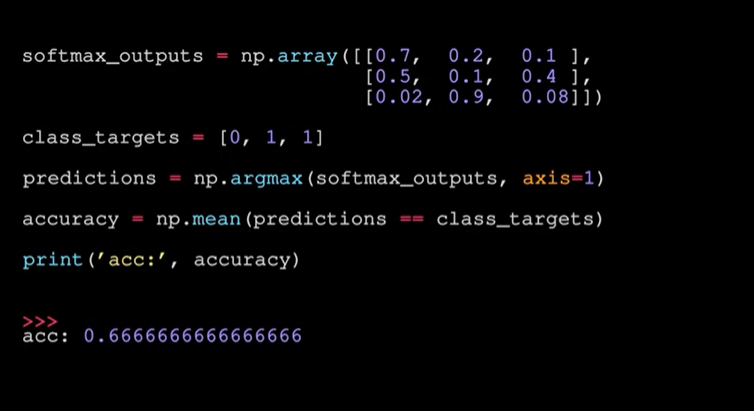

In [ ]:
# randomly generating weights and biases doesnot tend to be effect
# here's how to do it anyway to show how it works before beginning to optimization
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

dense1 = layer_dense(2,3)
activation1 = activation_relu()
dense2 = layer_dense(3, 3)
activation2 = activation_softmax()

loss_function = loss_categorical_cross_entropy()

lowest to_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
  dense1.weight = 0.05 * np.random.randn(2, 3)
  dense1.biases = 0.05 * np.random.randn(1, 3)
  dense2.weights = 0.05 * np.random.randn(3, 3)
  dense2.biases = 0.05 * np.random.randn(1, 3)
  
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense.output)
  
  loss = loss_function.calculate(activation2.output, y)
  predictions = np.argmax(activation2.output, axis=1)
  accuracy = np.mean(predictions==y)
  
  if loss < lowest_loss:
  print('new set of weights found, iteration:', iteration,
        "loss:", loss, "acc:" , accuracy)
        best_dense1_weights = dense1.weight.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
# there should be really fast but it'snot 

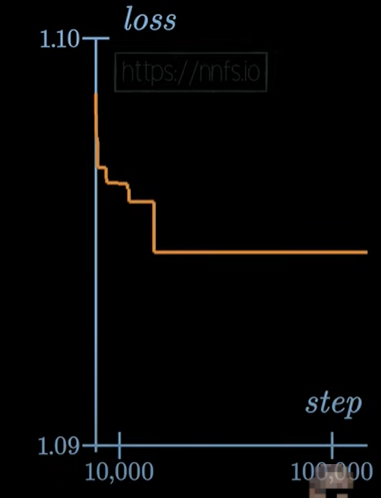

In [ ]:
# an easy way to fix this as to have a tweak your best weights and biases instead(rain limits in bytes)
nnfs.init()

X, y = vertical_data(samples=100, classes=3)

dense1 = layer_dense(2,3)
activation1 = activation_relu()
dense2 = layer_dense(3, 3)
activation2 = activation_softmax()

loss_function = loss_categorical_cross_entropy()

lowest to_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
  dense1.weight += 0.05 * np.random.randn(2, 3)
  dense1.biases += 0.05 * np.random.randn(1, 3)
  dense2.weights += 0.05 * np.random.randn(3, 3)
  dense2.biases += 0.05 * np.random.randn(1, 3)
  
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense.output)
  
  loss = loss_function.calculate(activation2.output, y)
  predictions = np.argmax(activation2.output, axis=1)
  accuracy = np.mean(predictions==y)
  
  if loss < lowest_loss:
  print('new set of weights found, iteration:', iteration,
        "loss:", loss, "acc:" , accuracy)
        best_dense1_weights = dense1.weight.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
  else:
    dense1.weights =  best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights =  best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()
# better to find a way to tweak than to get random numbers everytime

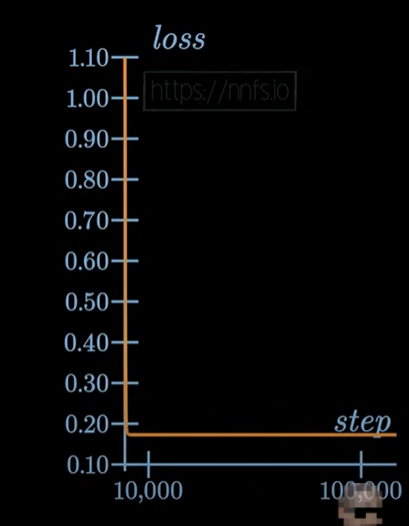

In [ ]:
# this doesnt work well with complex data
# to get machine learning better with complex data 
# where we cannot use the slope because it is nonlinear,
# we can use calculus to calcultae the slope from 2 incredibly close points
# and get our tangent slope

def f(x):
  return 2*x**2

p2_delta = 0.0001

x1 = 1.0
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

approximate_derivative = (y2-y1)/(x2-x1)
print(approximate_derivative)

In [ ]:
x = np.arange(0, 50, 0.001)
y=f(x)

plt.plot(x, y)

colors = ["k", "g", "r", "b", "c"]

def approximate_tangent_line(x, approximate_derivative, b):
  return approximate_derivative*x + b
  
for i in range(5):
  p2_delta = 0.0001
  x1 = i
  x2 = x1+p2_delta
  y1 = f(x1)
  y2 = f(x2)
  print((x1, y1), (x2, y2))
  approximate_derivative = (y2-y1)/(x2-x1)
  b = y2 - approximate_derivative+x2
  to_plot = [x1-0.9, x1, x1+0.9]
  plt.scatter(x1, y1, c=colors[i])
  plt.plot(to_plot, 
           [approximate_tangent_line(point, approximate_derivative, b)
           for point in to_plot],
           c=colors[i])
  print("approximate derivative for f(x)",
       f"where x = {x1}  is  {approximate_derivative}")
plt.show()